In [174]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [2]:
now = datetime.now()
now

datetime.datetime(2018, 1, 23, 17, 9, 57, 860283)

In [3]:
now.year, now.month, now.day

(2018, 1, 23)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [5]:
delta.days

926

In [6]:
delta.seconds

56700

In [7]:
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [8]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [9]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [11]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
#datetime.datetime(2011, 1, 3, 0, 0)

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [13]:
from dateutil.parser import parse

In [14]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [16]:
parse('6/12/2001', dayfirst=True)

datetime.datetime(2001, 12, 6, 0, 0)

In [17]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [18]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [19]:
idx[2]

NaT

In [20]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [21]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
        datetime(2011, 1, 7), datetime(2011, 1, 8),
        datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.956214
2011-01-05   -0.433201
2011-01-07   -1.020672
2011-01-08    0.980977
2011-01-10   -1.009388
2011-01-12   -0.942926
dtype: float64

In [22]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [23]:
ts + ts[::2]
# Recall that ts[::2] recalls every 2nd element of ts

2011-01-02    1.912428
2011-01-05         NaN
2011-01-07   -2.041345
2011-01-08         NaN
2011-01-10   -2.018777
2011-01-12         NaN
dtype: float64

In [24]:
ts.index.dtype

dtype('<M8[ns]')

In [25]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

In [26]:
stamp = ts.index[2]
ts[stamp]

-1.0206723332910994

In [27]:
ts['1/10/2011']

-1.0093883995412047

In [28]:
ts['20110110']

-1.0093883995412047

In [29]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.678811
2000-01-02    0.319045
2000-01-03    0.075525
2000-01-04    0.241611
2000-01-05    0.386029
2000-01-06    0.136927
2000-01-07   -0.810855
2000-01-08   -1.579958
2000-01-09    0.205076
2000-01-10    0.811025
2000-01-11   -1.743368
2000-01-12   -0.443511
2000-01-13   -0.229313
2000-01-14    0.432609
2000-01-15    0.716092
2000-01-16    1.874814
2000-01-17   -1.232143
2000-01-18    0.068357
2000-01-19    0.801410
2000-01-20    0.088284
2000-01-21   -1.146221
2000-01-22   -0.898085
2000-01-23   -0.193583
2000-01-24   -0.780123
2000-01-25    0.484474
2000-01-26   -0.405366
2000-01-27    0.103843
2000-01-28   -0.800134
2000-01-29    1.763479
2000-01-30   -1.385705
                ...   
2002-08-28   -0.822716
2002-08-29   -0.288325
2002-08-30   -0.959187
2002-08-31    0.361229
2002-09-01   -0.664117
2002-09-02   -0.900354
2002-09-03   -2.340260
2002-09-04    0.740349
2002-09-05   -0.063864
2002-09-06    1.053490
2002-09-07   -0.271014
2002-09-08    0.349763
2002-09-09 

In [30]:
longer_ts['2001']

2001-01-01    0.483661
2001-01-02   -0.530188
2001-01-03   -1.202166
2001-01-04   -0.747668
2001-01-05    0.078234
2001-01-06   -0.151449
2001-01-07    2.091970
2001-01-08   -1.017949
2001-01-09    0.258167
2001-01-10   -1.559398
2001-01-11    1.605725
2001-01-12   -0.577976
2001-01-13    0.579381
2001-01-14   -0.989714
2001-01-15   -0.686182
2001-01-16    0.655365
2001-01-17   -0.424137
2001-01-18    0.845851
2001-01-19   -0.846580
2001-01-20   -2.941196
2001-01-21   -0.059181
2001-01-22   -0.198165
2001-01-23    0.366522
2001-01-24    1.070186
2001-01-25   -0.160782
2001-01-26    0.523377
2001-01-27    2.841899
2001-01-28   -1.240182
2001-01-29    1.595628
2001-01-30   -1.234536
                ...   
2001-12-02   -0.037055
2001-12-03    0.647568
2001-12-04    0.271154
2001-12-05   -0.358639
2001-12-06   -2.426718
2001-12-07   -1.759524
2001-12-08    1.119656
2001-12-09    1.431497
2001-12-10   -0.182755
2001-12-11    1.174390
2001-12-12    0.162107
2001-12-13    1.229769
2001-12-14 

In [31]:
longer_ts['2001-05']

2001-05-01   -0.731536
2001-05-02   -2.473703
2001-05-03    0.596598
2001-05-04   -0.224108
2001-05-05    1.234669
2001-05-06   -0.061213
2001-05-07   -1.177250
2001-05-08   -0.236690
2001-05-09    0.003551
2001-05-10   -0.264299
2001-05-11    0.894491
2001-05-12    1.581823
2001-05-13   -1.388401
2001-05-14    0.216725
2001-05-15   -1.167908
2001-05-16   -2.011702
2001-05-17   -0.506588
2001-05-18    2.635803
2001-05-19   -0.411226
2001-05-20    0.485437
2001-05-21    0.950650
2001-05-22   -1.235195
2001-05-23   -0.366064
2001-05-24   -1.289196
2001-05-25    0.652502
2001-05-26    0.968463
2001-05-27    0.215738
2001-05-28    0.572877
2001-05-29   -0.099794
2001-05-30    1.259655
2001-05-31   -2.048876
Freq: D, dtype: float64

In [32]:
ts[datetime(2011, 1, 7):]

2011-01-07   -1.020672
2011-01-08    0.980977
2011-01-10   -1.009388
2011-01-12   -0.942926
dtype: float64

In [33]:
ts

2011-01-02    0.956214
2011-01-05   -0.433201
2011-01-07   -1.020672
2011-01-08    0.980977
2011-01-10   -1.009388
2011-01-12   -0.942926
dtype: float64

In [34]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.020672
2011-01-08    0.980977
2011-01-10   -1.009388
dtype: float64

In [35]:
ts.truncate(after='1/9/2011')

2011-01-02    0.956214
2011-01-05   -0.433201
2011-01-07   -1.020672
2011-01-08    0.980977
dtype: float64

In [36]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-1.095515,-1.099138,-1.947227,-0.682624
2001-05-09,1.972596,0.507431,-0.708474,-1.784772
2001-05-16,-0.309329,-0.159385,0.293677,0.251881
2001-05-23,0.377372,0.366665,-0.640922,-0.444930
2001-05-30,0.998638,0.153602,-0.821402,0.565859


In [37]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                    '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [38]:
dup_ts.index.is_unique

False

In [39]:
dup_ts['1/3/2000'] # not duplicated

4

In [40]:
dup_ts['1/2/2000'] # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [41]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [42]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [43]:
ts

2011-01-02    0.956214
2011-01-05   -0.433201
2011-01-07   -1.020672
2011-01-08    0.980977
2011-01-10   -1.009388
2011-01-12   -0.942926
dtype: float64

In [44]:
resampler = ts.resample('D') # 'D' is interpreted as daily frequency

In [45]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [49]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [51]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [52]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM') # 'BM' is the business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [53]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [54]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [55]:
from pandas.tseries.offsets import Hour, Minute

In [56]:
hour = Hour()
hour

<Hour>

In [57]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [58]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [59]:
Hour(2) + Minute(38)

<158 * Minutes>

In [60]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [61]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI') #'WOM' stands for week of month
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

In [62]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

# A Common use of shift is computing percent changes in a time series as DataFrame columns, expressed as ts/ts.shift(1) - 1

2000-01-31   -0.117834
2000-02-29   -0.188569
2000-03-31    0.354794
2000-04-30   -0.581663
Freq: M, dtype: float64

In [63]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.117834
2000-04-30   -0.188569
Freq: M, dtype: float64

In [64]:
ts.shift(-2)

2000-01-31    0.354794
2000-02-29   -0.581663
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [65]:
ts.shift(2, freq='M')

2000-03-31   -0.117834
2000-04-30   -0.188569
2000-05-31    0.354794
2000-06-30   -0.581663
Freq: M, dtype: float64

In [66]:
ts.shift(3, freq='D')

2000-02-03   -0.117834
2000-03-03   -0.188569
2000-04-03    0.354794
2000-05-03   -0.581663
dtype: float64

In [67]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.117834
2000-02-29 01:30:00   -0.188569
2000-03-31 01:30:00    0.354794
2000-04-30 01:30:00   -0.581663
Freq: M, dtype: float64

In [68]:
from pandas.tseries.offsets import Day, MonthEnd

In [69]:
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [70]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [71]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [72]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [73]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [74]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -1.005399
2000-01-19    0.845901
2000-01-23   -2.051227
2000-01-27    0.289123
2000-01-31   -0.134546
2000-02-04    0.183505
2000-02-08    0.303446
2000-02-12   -1.647381
2000-02-16    0.817207
2000-02-20   -0.409951
2000-02-24   -0.138282
2000-02-28   -0.111572
2000-03-03   -0.196941
2000-03-07    1.087664
2000-03-11    0.036787
2000-03-15   -0.253892
2000-03-19    1.279469
2000-03-23    1.311891
2000-03-27   -1.054798
2000-03-31    0.403530
Freq: 4D, dtype: float64

In [75]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.411230
2000-02-29   -0.143290
2000-03-31    0.326714
dtype: float64

In [76]:
ts.resample('M').mean()

2000-01-31   -0.411230
2000-02-29   -0.143290
2000-03-31    0.326714
Freq: M, dtype: float64

In [77]:
import pytz

In [78]:
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [79]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [80]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.404749
2012-03-10 09:30:00   -0.052631
2012-03-11 09:30:00   -1.802608
2012-03-12 09:30:00    0.836891
2012-03-13 09:30:00    0.672131
2012-03-14 09:30:00    0.940114
Freq: D, dtype: float64

In [81]:
print(ts.index.tz)

None


In [82]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [83]:
ts

2012-03-09 09:30:00    0.404749
2012-03-10 09:30:00   -0.052631
2012-03-11 09:30:00   -1.802608
2012-03-12 09:30:00    0.836891
2012-03-13 09:30:00    0.672131
2012-03-14 09:30:00    0.940114
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.404749
2012-03-10 09:30:00+00:00   -0.052631
2012-03-11 09:30:00+00:00   -1.802608
2012-03-12 09:30:00+00:00    0.836891
2012-03-13 09:30:00+00:00    0.672131
2012-03-14 09:30:00+00:00    0.940114
Freq: D, dtype: float64

In [85]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [86]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.404749
2012-03-10 04:30:00-05:00   -0.052631
2012-03-11 05:30:00-04:00   -1.802608
2012-03-12 05:30:00-04:00    0.836891
2012-03-13 05:30:00-04:00    0.672131
2012-03-14 05:30:00-04:00    0.940114
Freq: D, dtype: float64

In [87]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.404749
2012-03-10 14:30:00+00:00   -0.052631
2012-03-11 13:30:00+00:00   -1.802608
2012-03-12 13:30:00+00:00    0.836891
2012-03-13 13:30:00+00:00    0.672131
2012-03-14 13:30:00+00:00    0.940114
Freq: D, dtype: float64

In [88]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.404749
2012-03-10 15:30:00+01:00   -0.052631
2012-03-11 14:30:00+01:00   -1.802608
2012-03-12 14:30:00+01:00    0.836891
2012-03-13 14:30:00+01:00    0.672131
2012-03-14 14:30:00+01:00    0.940114
Freq: D, dtype: float64

In [89]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [90]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [91]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [92]:
stamp_utc.value

1299902400000000000

In [93]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

In [94]:
from pandas.tseries.offsets import Hour

In [95]:
stamp = pd.Timestamp('2012-03-12 1:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [96]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [97]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [98]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [99]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.020212
2012-03-08 09:30:00   -1.541622
2012-03-09 09:30:00    0.671673
2012-03-12 09:30:00    0.158615
2012-03-13 09:30:00   -1.081490
2012-03-14 09:30:00    1.449062
2012-03-15 09:30:00   -0.420924
2012-03-16 09:30:00    0.080562
2012-03-19 09:30:00   -0.658043
2012-03-20 09:30:00   -1.488439
Freq: B, dtype: float64

In [100]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [101]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [102]:
p + 5

Period('2012', 'A-DEC')

In [103]:
p - 2

Period('2005', 'A-DEC')

In [104]:
pd.Period('2014', freq='A-DEC') - p

7

In [105]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [106]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.292555
2000-02   -0.889272
2000-03    0.318166
2000-04    0.058855
2000-05   -2.162734
2000-06   -0.794976
Freq: M, dtype: float64

In [107]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

In [108]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [109]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [110]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [111]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [112]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [113]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [114]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [115]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.174862
2007   -0.287492
2008   -1.470568
2009    0.595281
Freq: A-DEC, dtype: float64

In [116]:
ts.asfreq('M', how='start')

2006-01   -0.174862
2007-01   -0.287492
2008-01   -1.470568
2009-01    0.595281
Freq: M, dtype: float64

In [117]:
ts.asfreq('B', how='end')

2006-12-29   -0.174862
2007-12-31   -0.287492
2008-12-31   -1.470568
2009-12-31    0.595281
Freq: B, dtype: float64

In [118]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [119]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [120]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [121]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
# timestamp at 4pm on the second to last business day of the quarter
p4pm

Period('2012-01-30 16:00', 'T')

In [122]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [123]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [124]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

In [125]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.346021
2000-02-29   -0.426402
2000-03-31   -1.962595
Freq: M, dtype: float64

In [126]:
pts = ts.to_period()
pts

2000-01    0.346021
2000-02   -0.426402
2000-03   -1.962595
Freq: M, dtype: float64

In [127]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29    0.291626
2000-01-30   -0.398632
2000-01-31    0.373675
2000-02-01    0.832679
2000-02-02    1.150162
2000-02-03    0.041935
Freq: D, dtype: float64

In [128]:
ts2.to_period('M')

2000-01    0.291626
2000-01   -0.398632
2000-01    0.373675
2000-02    0.832679
2000-02    1.150162
2000-02    0.041935
Freq: M, dtype: float64

In [129]:
pts = ts2.to_period()
pts

2000-01-29    0.291626
2000-01-30   -0.398632
2000-01-31    0.373675
2000-02-01    0.832679
2000-02-02    1.150162
2000-02-03    0.041935
Freq: D, dtype: float64

In [130]:
pts.to_timestamp(how='end')

2000-01-29    0.291626
2000-01-30   -0.398632
2000-01-31    0.373675
2000-02-01    0.832679
2000-02-02    1.150162
2000-02-03    0.041935
Freq: D, dtype: float64

In [131]:
data = pd.read_csv('examples/macrodata.csv')
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


In [132]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [133]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
10     1961.0
11     1961.0
12     1962.0
13     1962.0
14     1962.0
15     1962.0
16     1963.0
17     1963.0
18     1963.0
19     1963.0
20     1964.0
21     1964.0
22     1964.0
23     1964.0
24     1965.0
25     1965.0
26     1965.0
27     1965.0
28     1966.0
29     1966.0
        ...  
173    2002.0
174    2002.0
175    2002.0
176    2003.0
177    2003.0
178    2003.0
179    2003.0
180    2004.0
181    2004.0
182    2004.0
183    2004.0
184    2005.0
185    2005.0
186    2005.0
187    2005.0
188    2006.0
189    2006.0
190    2006.0
191    2006.0
192    2007.0
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [134]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
10     3.0
11     4.0
12     1.0
13     2.0
14     3.0
15     4.0
16     1.0
17     2.0
18     3.0
19     4.0
20     1.0
21     2.0
22     3.0
23     4.0
24     1.0
25     2.0
26     3.0
27     4.0
28     1.0
29     2.0
      ... 
173    2.0
174    3.0
175    4.0
176    1.0
177    2.0
178    3.0
179    4.0
180    1.0
181    2.0
182    3.0
183    4.0
184    1.0
185    2.0
186    3.0
187    4.0
188    1.0
189    2.0
190    3.0
191    4.0
192    1.0
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [135]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                      freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [136]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

In [137]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.067327
2000-01-02    1.377376
2000-01-03   -0.337800
2000-01-04    2.042909
2000-01-05    0.180340
2000-01-06   -0.434854
2000-01-07    1.456875
2000-01-08   -0.661570
2000-01-09    0.244047
2000-01-10   -0.750596
2000-01-11    0.121658
2000-01-12   -0.617256
2000-01-13   -1.871360
2000-01-14    0.199341
2000-01-15   -0.442502
2000-01-16   -0.100419
2000-01-17    1.071360
2000-01-18   -0.614933
2000-01-19    0.088997
2000-01-20   -0.758469
2000-01-21    0.004204
2000-01-22    0.441476
2000-01-23    0.551787
2000-01-24    2.464633
2000-01-25   -1.482788
2000-01-26    0.898688
2000-01-27    1.562332
2000-01-28    0.594632
2000-01-29   -0.985273
2000-01-30   -1.335156
                ...   
2000-03-11    0.360993
2000-03-12   -0.644834
2000-03-13   -2.148736
2000-03-14    0.572083
2000-03-15    0.939112
2000-03-16    1.077773
2000-03-17   -1.506414
2000-03-18   -0.108525
2000-03-19   -1.126299
2000-03-20    0.311624
2000-03-21    0.927476
2000-03-22   -1.090449
2000-03-23 

In [138]:
ts.resample('M').mean()

2000-01-31    0.107608
2000-02-29   -0.050320
2000-03-31   -0.148377
2000-04-30    0.399237
Freq: M, dtype: float64

In [139]:
ts.resample('M', kind='period').mean()

2000-01    0.107608
2000-02   -0.050320
2000-03   -0.148377
2000-04    0.399237
Freq: M, dtype: float64

In [141]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [142]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [143]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [145]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [146]:
ts.resample('5min', closed='right',
           label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [147]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [148]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('1/1/2000', periods=2,
                                       freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.629914,-0.093733,0.592210,-0.741673
2000-01-12,-1.686179,-0.856333,2.080681,-0.277194


In [149]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.629914,-0.093733,0.592210,-0.741673
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.686179,-0.856333,2.080681,-0.277194


In [150]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.629914,-0.093733,0.592210,-0.741673
2000-01-06,-0.629914,-0.093733,0.592210,-0.741673
2000-01-07,-0.629914,-0.093733,0.592210,-0.741673
2000-01-08,-0.629914,-0.093733,0.592210,-0.741673
2000-01-09,-0.629914,-0.093733,0.592210,-0.741673
2000-01-10,-0.629914,-0.093733,0.592210,-0.741673
2000-01-11,-0.629914,-0.093733,0.592210,-0.741673
2000-01-12,-1.686179,-0.856333,2.080681,-0.277194


In [151]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.629914,-0.093733,0.592210,-0.741673
2000-01-06,-0.629914,-0.093733,0.592210,-0.741673
2000-01-07,-0.629914,-0.093733,0.592210,-0.741673
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.686179,-0.856333,2.080681,-0.277194


In [152]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.629914,-0.093733,0.592210,-0.741673
2000-01-13,-1.686179,-0.856333,2.080681,-0.277194


In [154]:
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001',
                                       freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.031231,0.305883,-0.635363,0.365154
2000-02,0.408196,-0.516201,0.022998,-0.325064
2000-03,1.750631,-0.094286,-0.165292,-0.757059
2000-04,-0.755738,0.940905,1.496729,0.435851
2000-05,0.208812,1.946811,-0.991009,0.515042


In [155]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.097153,0.144244,0.026804,0.079308
2001,-0.374622,0.027734,-0.082710,0.232656


In [156]:
# Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.097153,0.144244,0.026804,0.079308
2000Q2,0.097153,0.144244,0.026804,0.079308
2000Q3,0.097153,0.144244,0.026804,0.079308
2000Q4,0.097153,0.144244,0.026804,0.079308
2001Q1,-0.374622,0.027734,-0.082710,0.232656
2001Q2,-0.374622,0.027734,-0.082710,0.232656
2001Q3,-0.374622,0.027734,-0.082710,0.232656
2001Q4,-0.374622,0.027734,-0.082710,0.232656


In [157]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.097153,0.144244,0.026804,0.079308
2001Q1,0.097153,0.144244,0.026804,0.079308
2001Q2,0.097153,0.144244,0.026804,0.079308
2001Q3,0.097153,0.144244,0.026804,0.079308
2001Q4,-0.374622,0.027734,-0.082710,0.232656


In [158]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.097153,0.144244,0.026804,0.079308
2001Q1,0.097153,0.144244,0.026804,0.079308
2001Q2,0.097153,0.144244,0.026804,0.079308
2001Q3,0.097153,0.144244,0.026804,0.079308
2001Q4,-0.374622,0.027734,-0.082710,0.232656
2002Q1,-0.374622,0.027734,-0.082710,0.232656
2002Q2,-0.374622,0.027734,-0.082710,0.232656
2002Q3,-0.374622,0.027734,-0.082710,0.232656


<IPython.core.display.Javascript object>


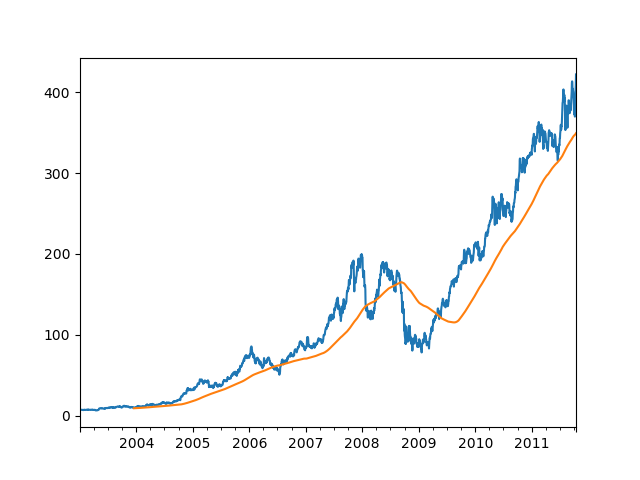

In [179]:
import matplotlib.pyplot as plt

close_px_all = pd.read_csv('examples/stock_px_2.csv', 
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()

In [180]:
close_px.AAPL.rolling(250).mean().plot()

In [177]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<IPython.core.display.Javascript object>


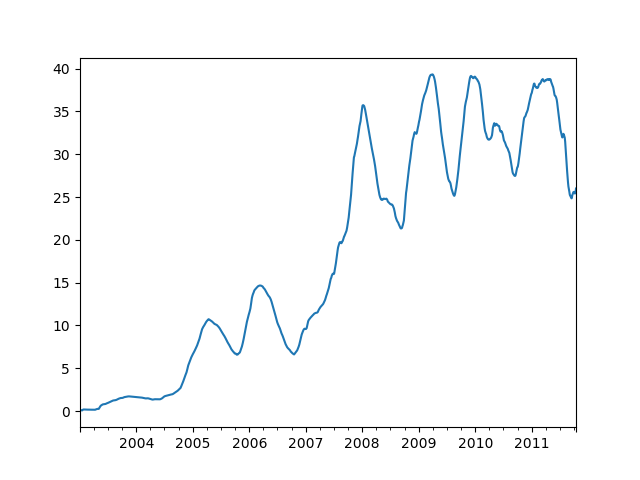

In [182]:
fig = plt.figure()
appl_std250.plot()

In [183]:
expanding_mean = appl_std250.expanding().mean()

<IPython.core.display.Javascript object>


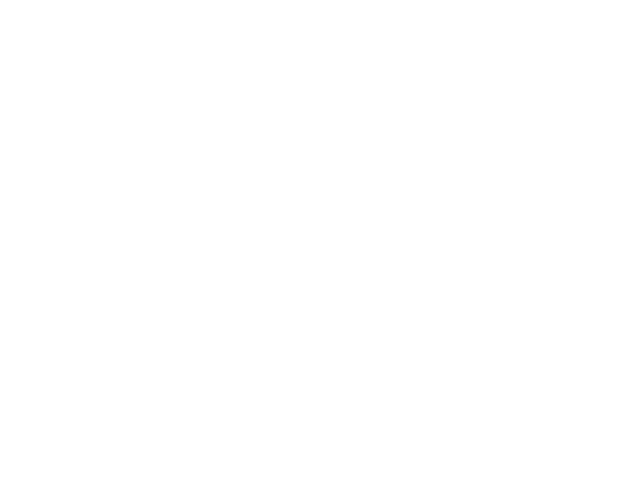

<IPython.core.display.Javascript object>


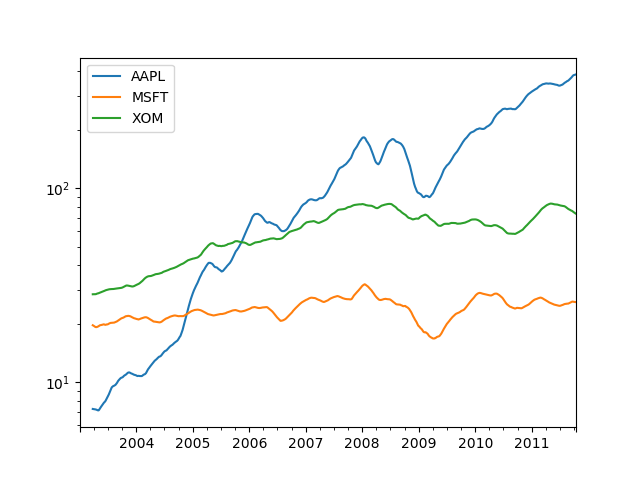

In [184]:
fig = plt.figure()
close_px.rolling(60).mean().plot(logy=True)

In [185]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


<IPython.core.display.Javascript object>


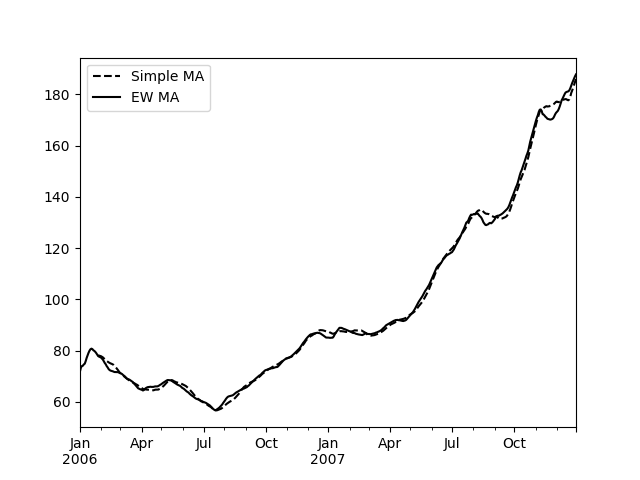

In [186]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
fig = plt.figure()

In [187]:
ma60.plot(style='k--', label='Simple MA')

In [188]:
ewma60.plot(style='k-', label='EW MA')

In [189]:
plt.legend()

In [190]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

<IPython.core.display.Javascript object>


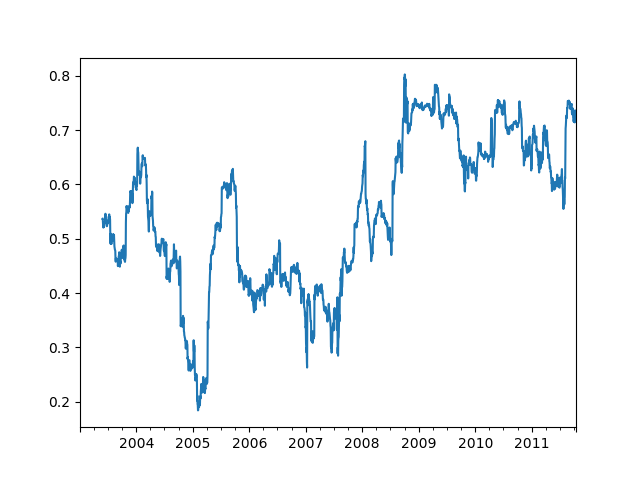

In [191]:
fig = plt.figure()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<IPython.core.display.Javascript object>


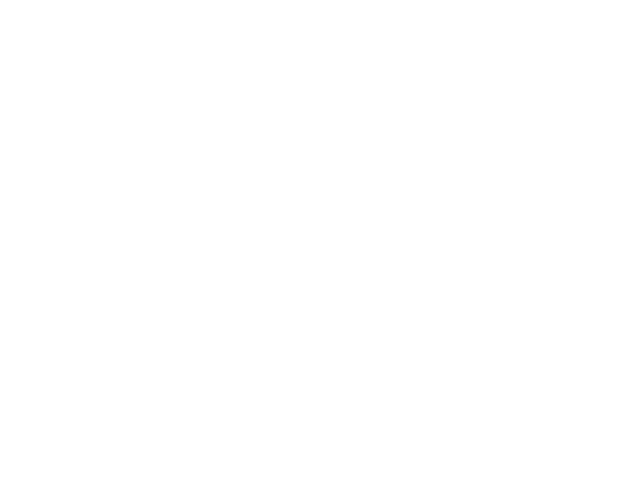

<IPython.core.display.Javascript object>


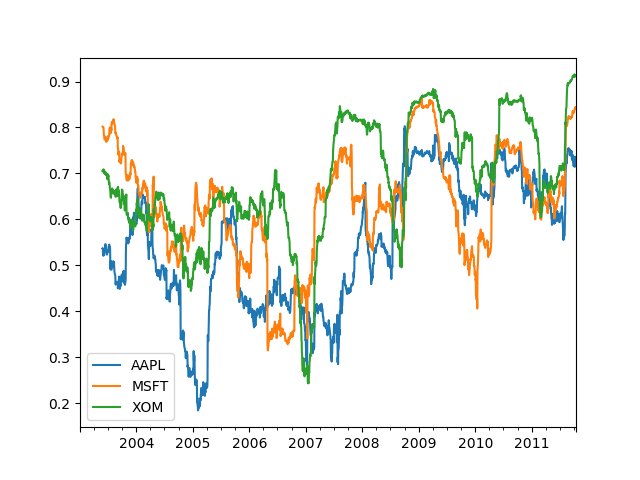

In [192]:
fig = plt.figure()
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<IPython.core.display.Javascript object>


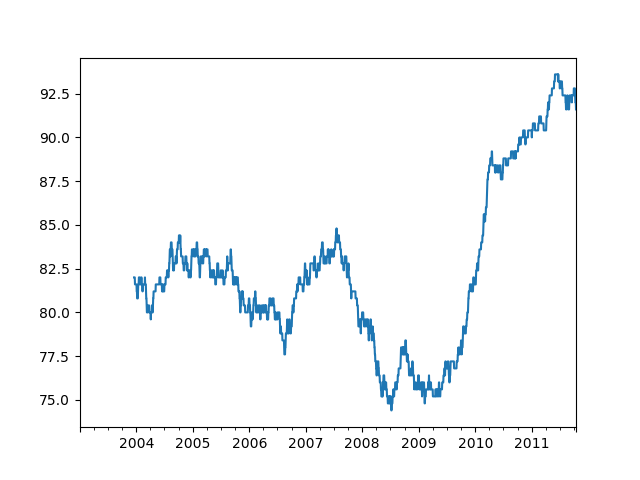

In [193]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
fig = plt.figure()
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()